In [39]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
import seaborn as sns
#from skimage

In [2]:
%matplotlib inline

#### Comparison suggests the use of openCV with optimization (default from installation) http://blog.mmast.net/python-image-processing-libraries-performance-opencv-scipy-scikit-image

home = os.getenv("HOME")
os.chdir('/media/giacomo/CE82DCC682DCB3E5/Users/Giacomo/Documents/gitRepos/bubble_size_analysis/tests')

In [3]:
# Need: recongnize environment (Linux/Win) and use a path accordingly

#cd '/media/giacomo/CE82DCC682DCB3E5/Users/Giacomo/Documents/gitRepos/bubble_size_analysis/tests' #Linux
case_dir = r'C:\Users\Giacomo\Documents\gitRepos\bubble_size_analysis\tests'
os.chdir(case_dir)

In [80]:
img = cv2.imread('0325097m_0305.tif')

In [87]:
# Channel separation
img_B = img[:,:,0]
img_G = img[:,:,1]
img_R = img[:,:,2]

In [88]:
# reorder layers according to RGB in img2
img2[:,:,0]= img[:,:,2]
img2[:,:,1]= img[:,:,1]
img2[:,:,2]= img[:,:,0]

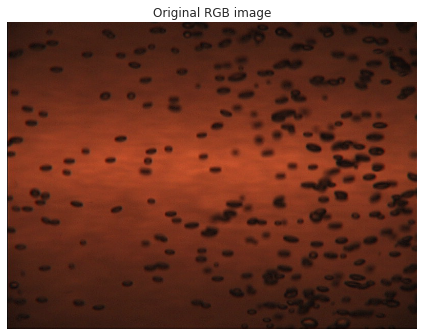

In [89]:
plt.imshow(img2), plt.grid('off'), plt.xticks([]), plt.yticks([]), plt.title('Original RGB image'); #original image

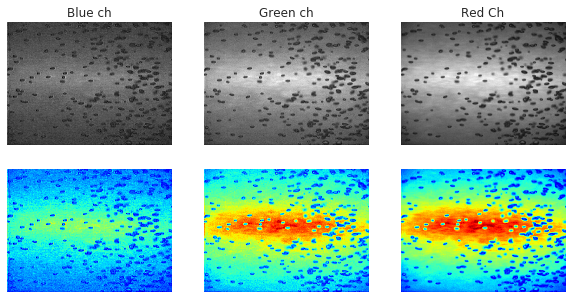

In [49]:
# here we can select the most contrasting image, in our case is Red channel
plt.figure(figsize=(10, 10))
plt.subplot(2,3,1), plt.imshow(img_B, cmap='gray'), plt.title('Blue ch'), plt.xticks([]), plt.yticks([]); 
plt.subplot(2,3,2), plt.imshow(img_G, cmap='gray'), plt.title('Green ch'), plt.xticks([]), plt.yticks([]); 
plt.subplot(2,3,3), plt.imshow(img_R, cmap='gray'), plt.title('Red Ch'), plt.xticks([]), plt.yticks([]); 
plt.subplot(2,3,4), plt.imshow(img_B, cmap='jet'), plt.xticks([]), plt.yticks([]); 
plt.subplot(2,3,5), plt.imshow(img_G, cmap='jet'), plt.xticks([]), plt.yticks([]); 
plt.subplot(2,3,6), plt.imshow(img_R, cmap='jet'), plt.xticks([]), plt.yticks([]); 
plt.subplots_adjust(top=0.5); 

### Edge detection with Canny

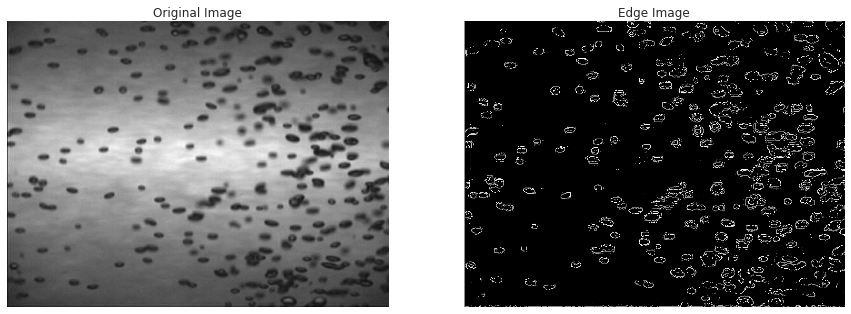

In [166]:
edges = cv2.Canny(img_R, 60, 60) #arguments are min and max thresholds (define optimum comparing with matlab scipts)

plt.figure(figsize=(15, 15))
plt.subplot(1,2,1) 
plt.imshow(img_R, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2), plt.imshow(edges, cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

### Dilate function

In [167]:
kernel = np.ones((2,2), np.uint8)
dst = cv2.dilate(edges, kernel, iterations=1);

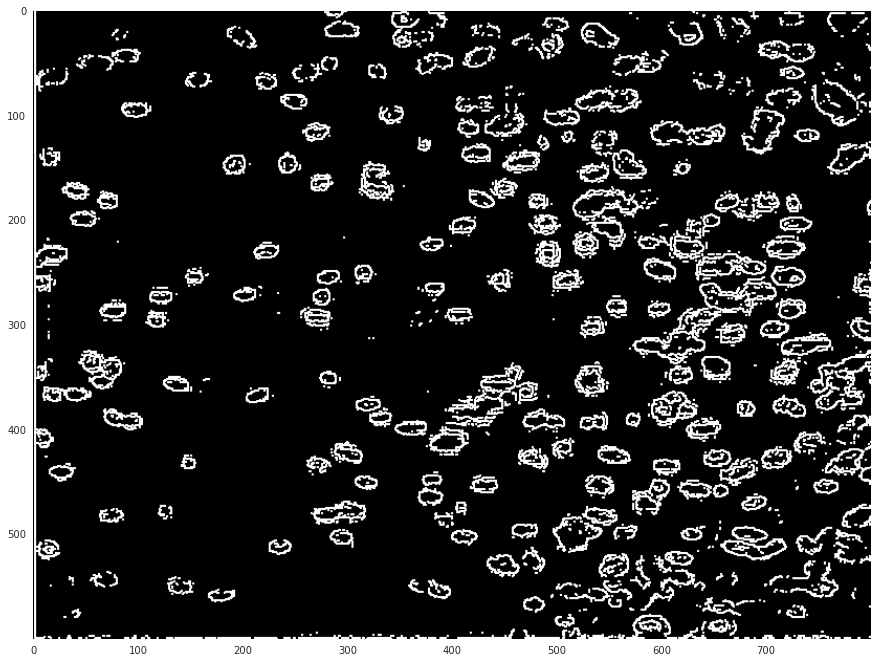

In [168]:
plt.figure(figsize=(15, 15))
plt.imshow(dst, cmap='gray'), plt.grid('off');

### Fill holes

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

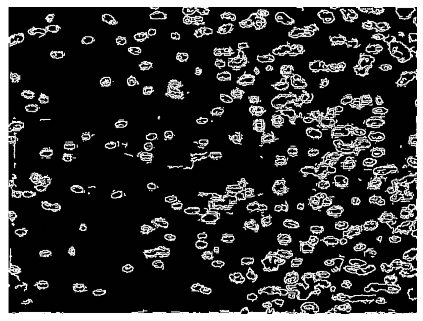

In [165]:
binImg = cv2.adaptiveThreshold(dst, 1, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 55, -3)
plt.imshow(binImg, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])

In [160]:
h, w = dst.shape[:2] #stores image sizes
mask = np.zeros((h+2, w+2), np.uint8)
img_flood = cv2.floodFill(dst, mask, (0,0), 255);

# Invert floodfilled image
dst_inv = cv2.bitwise_not(dst)

# Combine the two images to get the foreground.
im_out = dst | dst_inv

# Display images
plt.subplot(2,2,1), plt.imshow(dst), plt.title('Thresholded Image'), plt.grid('off'), plt.xticks([]), plt.yticks([]);
#plt.subplot(2,2,2), plt.imshow(img_flood), plt.title('Floodfilled Image'), plt.grid('off'), plt.xticks([]), plt.yticks([]);
plt.subplot(2,2,3), plt.imshow(dst_inv), plt.title('Inverted Floodfilled Image'), plt.grid('off'), plt.xticks([]), plt.yticks([]);
plt.subplot(2,2,4), plt.imshow(im_out), plt.title('Foreground'), plt.grid('off'), plt.xticks([]), plt.yticks([]);
#cv2.waitKey(0)

TypeError: Required argument 'mask' (pos 2) not found

### Clear borders

### Erode borders

### Outlined image

### Label objects

### Get objects properties

# Possible alternatives/improvements (?)

### scikit image 

In [67]:
from skimage.morphology import reconstruction #ci mette un sacco a caricare

In [68]:
seed = np.copy(img_R)
seed[1:-1, 1:-1] = img_R.min()
mask = img_R

dilated = reconstruction(seed, mask, method='dilation')

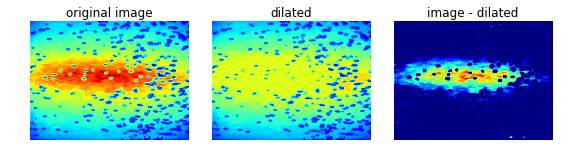

In [71]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 2.5), sharex=True, sharey=True)

ax1.imshow(img_R)
ax1.set_title('original image')
ax1.axis('off')
ax1.set_adjustable('box-forced')

ax2.imshow(dilated, vmin=img_R.min(), vmax=img_R.max())
ax2.set_title('dilated')
ax2.axis('off')
ax2.set_adjustable('box-forced')

ax3.imshow(img_R - dilated)
ax3.set_title('image - dilated')
ax3.axis('off')
ax3.set_adjustable('box-forced')

fig.tight_layout()

In [74]:
h = 0.4
seed = img_R - h
dilated = reconstruction(seed, mask, method='dilation')
hdome = img_R - dilated

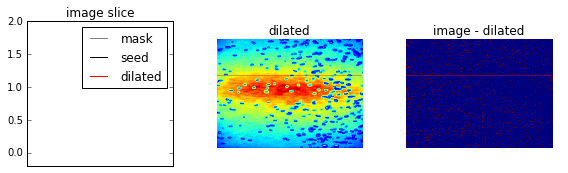

In [76]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 2.5))

yslice = 197

ax1.plot(mask[yslice], '0.5', label='mask')
ax1.plot(seed[yslice], 'k', label='seed')
ax1.plot(dilated[yslice], 'r', label='dilated')
ax1.set_ylim(-0.2, 2)
ax1.set_title('image slice')
ax1.set_xticks([])
ax1.legend()

ax2.imshow(dilated, vmin=img_R.min(), vmax=img_R.max())
ax2.axhline(yslice, color='r', alpha=0.4)
ax2.set_title('dilated')
ax2.axis('off')

ax3.imshow(hdome)
ax3.axhline(yslice, color='r', alpha=0.4)
ax3.set_title('image - dilated')
ax3.axis('off')

fig.tight_layout()
plt.show()

#### in this case the trick original image minus dilated do not work well

### Otsu's thresholding, potentially applicable to powerup Canny http://docs.opencv.org/trunk/d7/d4d/tutorial_py_thresholding.html

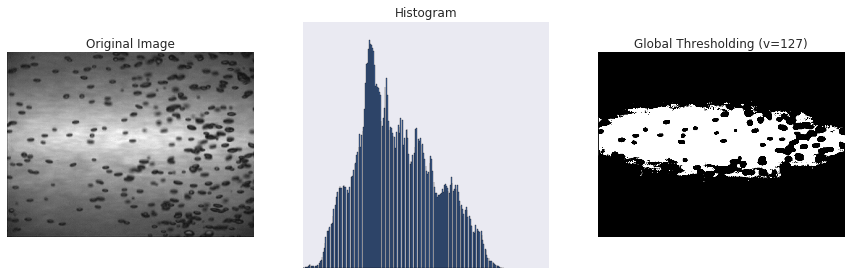

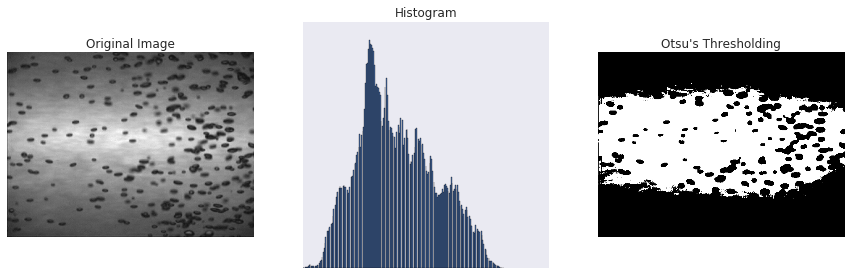

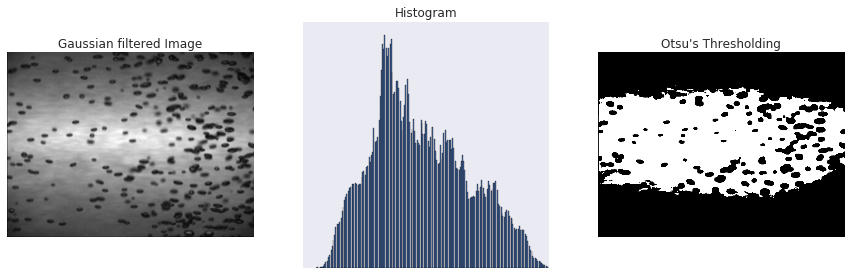

In [99]:
# global thresholding
ret1,th1 = cv2.threshold(img_R, 127, 255, cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img_R,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img_R,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img_R, 0, th1,
          img_R, 0, th2,
          blur, 0, th3]
titles = ['Original Image','Histogram','Global Thresholding (v=127)',
          'Original Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in xrange(3):
    plt.figure(figsize=(15,15))
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
    plt.show()

### blob detector https://www.learnopencv.com/blob-detection-using-opencv-python-c/

In [171]:
# Set up the detector with default parameters.
detector = cv2.SimpleBlobDetector()
 
# Detect blobs
keypoints = detector.detect(img_R)
 
# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(img_R, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
 
# Show keypoints
cv2.imshow("Keypoints", im_with_keypoints)
cv2.waitKey(0)

-1

In [170]:
# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()
 
# Change thresholds
params.minThreshold = 10;
params.maxThreshold = 200;
 
# Filter by Area.
params.filterByArea = True
params.minArea = 1500
 
# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.1
 
# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.87
 
# Filter by Inertia
params.filterByInertia = True
params.minInertiaRatio = 0.01
 
# Create a detector with the parameters
ver = (cv2.__version__).split('.')
if int(ver[0]) < 3 :
    detector = cv2.SimpleBlobDetector(params)
else : 
    detector = cv2.SimpleBlobDetector_create(params)